# Preprocessing

In [1]:
# Data processing of the questionnaire
# https://forms.gle/TiY3p9WSkGV8mNKk6

# importing packages
import pandas as pd
#from SPARQLWrapper import SPARQLWrapper, JSON
#import lxml

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os.path, time
#inNotebook = True # change this to True if you use a notebook
#def nextplot():
#    if inNotebook:
#        plt.figure()  # this creates a new plot
#    else:
#        plt.clf()     # and this clears the current one

!python --version
print('------------')
print("Pandas " + pd.__version__)
print("Numpy " + np.__version__)
print("Seaborn " + sns.__version__)

Python 3.7.6
------------
Pandas 1.3.4
Numpy 1.18.1
Seaborn 0.11.2


In [2]:
df = pd.read_csv('../data/Survey_data_processed.csv', sep=';')
print("Source file last modified: %s" % time.ctime(os.path.getmtime('../data/Survey_data_processed.csv')))
df.head()

Source file last modified: Wed Apr 13 17:04:06 2022


,Zeitstempel,Name up to three movies from the 90s,Name up to three actors,Name up to three music genres,Name up to three books,Name up to three (book) authors,Name up to three politicians,Name up to three US presidents,Name up to three cities,Name up to three lakes,...,Name up to three vegetables,Name up to three types of fast food,Name up to three landmarks/sights in Europe,Name up to three companies listed in the DAX (German stock index),Name up to three US companies,Name up to three US tech companies,What is your age?,What gender do you identify with?,What is the highest degree you have completed?,Which country are you from?
0,2022/02/28 5:09:27 PM OEZ,"The Matrix, Groundhog Day, Goodfellas","Tom Cruise, Amy Adams, Arnold Schwarzenegger","Pop, Techno, Rap","Dune, How Democracies Die, Harry Potter","Frank Herbert, George R. R. Martin, J. K. Rowl...","Barack Obama, Olaf Scholz, Robert Habeck","Barack Obama, Joe Biden, George Washington","Berlin, New York, Moskau","Bodensee, Lake Victoria, Lake Tahoe",...,"Peas, Carrot, Tomato","French Fries, Burger, Pizza","Eiffel tower, Brandenburger Gate, Colosseum","SAP, Allianz, Lufthansa","Microsoft, T-Mobile, Ralph Lauren","Apple, Google, Tesla",26.0,Male,Bachelor's degree,Germany
1,2022/03/01 5:03:02 PM OEZ,"Batman, Matrix, Eyes Wide Shut","Jack Nicholson, Nicole Kidman, George Clooney","Metal, Rock, Pop","Hamlet, Faust, Werther","Shakespeare, Goethe, Stephen King","Angela Merkel, Joe Biden, George W. Bush","Joe Biden, Goerge W. Bush, Barack Obama","New York, Amsterdam, Berlin","Lake Geneva, Lake Tahoe, Lake Eerie",...,"Cucumber, Tomato, Zucchini","Burger, Pizza, Fries","Eiffel Tower, Tower Bridge, Tower of Pisa","SAP, BMW, Siemens","Ford, General Electric, Meta","Meta, Alphabet, Zoom",44.0,Male,Doctorate (e.g. PhD),Germany
2,2022/03/01 5:34:10 PM OEZ,"Total Recall, Lethal Weapon, Predator","Gérard Depardieu, Christina Ricci, Brad Pitt","Funk, Rock, Electro","Hyperion, Harry Potter, Game of Thrones","Asimov, Frank Herbert, Simmons","Jean-Luc Mélenchon, Raphaël Correa, Gabriel Boric","George Washington, Abraham Lincoln, Richard Nixon","Paris, New York, Istanbul","Erie, Léman",...,"Leek, Cabbage, Potato","Burger, Poutine, Hotdog","Eiffel Tower, Pisa Tower, Stonehenge","Bayer, BMW, Volkswagen","General Motors, General Electric, McDonals","Google, Amazon, Microsoft",46.0,Male,Bachelor's degree,France
3,2022/03/01 6:25:03 PM OEZ,"Léon: The Professional, The Matrix, Departed","Brad Pitt, Denzel Washington, George Clooney","Techno, House, Jazz","Illuminati, Das Kapital, The Prisoner","J. K. Rowling, John Grisham, Dan Brown","Robert Habeck, Olaf Scholz, Martin Schulz","Donald Trump, John F. Kennedy, Gerald Ford","Berlin, New York, Kyiv","Gardasee, Lake Michigan, Bodensee",...,"Zucchini, Aubergine, Peppers","Burger, Fries, Pizza","Eiffeltower, Brandenburg Gate, London Eye","Deutsche Lufthansa AG, Volkswagen AG, Freseniu...","Apple, Alphabet, Tesla Motors","Alphabet, Apple, Oracle",28.0,Male,Master's degree,Germany
4,2022/03/01 6:31:24 PM OEZ,"Home Alone, matrix, titanic","Nicole Kidman, Meryl Streep, Penelope Cruz","Jazz, pop, hip-hop","Idiot, Noisy Bear, Being and Time","Dostoevsky, Nabokov, Bradbury","Merkel, Obama, Biden","Obama, Biden, Lincoln","Leuven, Chisinau, Moscow","Geneva lake Baikal lake, Lugano Lake",...,"Bell pepper, aubergine, tomato","Fries, burger, nuggets","Eiffel Tower, Big Ben, Maneken Piss","Zalando, Volkswagen, Daimler","Walmart, Amazon, Apple","Tesla, Google, Microsoft",34.0,Female,Master's degree,Switzerland


In [3]:
print("Answers submitted: " + str(len(df.index)))
print("Answers processe(approximately): " + str(len(df.index)*3))

Answers submitted: 109
Answers processe(approximately): 327


In [4]:
df_answers = df.count()
df_answers
#df_answers_mean = df_answers.mean()
#int(df_answers_mean)

Zeitstempel                                                          109
Name up to three movies from the 90s                                  96
Name up to three actors                                              107
Name up to three music genres                                        109
Name up to three books                                               104
Name up to three (book) authors                                      103
Name up to three politicians                                         109
Name up to three US presidents                                       108
Name up to three cities                                              109
Name up to three lakes                                               107
Name up to three mountains                                           109
Name up to three european capital cities                             109
Name up to three european countries                                  109
Name up to three asian countries                   

In [5]:
# dictionary for renaming column names
# key = old name : value = new name

dict_col_names = {'Zeitstempel':'timestamp',
        'Name up to three movies from the 90s': 'nineties_movies',
        'Name up to three actors': 'actors',
        'Name up to three music genres': 'music_genres',
        'Name up to three books':'books',
        'Name up to three (book) authors':'authors', #or book_authors?
        'Name up to three politicians':'politicians',
        'Name up to three US presidents':'us_presidents',
        'Name up to three cities':'cities',
        'Name up to three lakes':'lakes',
        'Name up to three mountains':'mountains',
        'Name up to three european capital cities':'european_capital_cities',
        'Name up to three european countries':'european_countries',
        'Name up to three asian countries':'asian_countries',
        'Name up to three continents':'continents',
        'Name up to three birds':'birds',
        'Name up to three african animals':'african_animals',
        'Name up to three pieces of furniture':'furniture',
        'Name up to three vegetables':'vegetables',
        'Name up to three types of fast food':'fast_food',
        'Name up to three landmarks/sights in Europe':'european_landmarks',
        'Name up to three companies listed in the DAX (German stock index)':'dax_companies',
        'Name up to three US companies':'us_companies',
        'Name up to three US tech companies':'us_tech_companies',
        'What is your age?':'p_age', # p for participant, partaker, player
        'What gender do you identify with?':'p_gender',
        'What is the highest degree you have completed?':'p_education',
        'Which country are you from?':'p_country'
}

df.rename(columns=dict_col_names, inplace=True)
df.head()

,timestamp,nineties_movies,actors,music_genres,books,authors,politicians,us_presidents,cities,lakes,...,vegetables,fast_food,european_landmarks,dax_companies,us_companies,us_tech_companies,p_age,p_gender,p_education,p_country
0,2022/02/28 5:09:27 PM OEZ,"The Matrix, Groundhog Day, Goodfellas","Tom Cruise, Amy Adams, Arnold Schwarzenegger","Pop, Techno, Rap","Dune, How Democracies Die, Harry Potter","Frank Herbert, George R. R. Martin, J. K. Rowl...","Barack Obama, Olaf Scholz, Robert Habeck","Barack Obama, Joe Biden, George Washington","Berlin, New York, Moskau","Bodensee, Lake Victoria, Lake Tahoe",...,"Peas, Carrot, Tomato","French Fries, Burger, Pizza","Eiffel tower, Brandenburger Gate, Colosseum","SAP, Allianz, Lufthansa","Microsoft, T-Mobile, Ralph Lauren","Apple, Google, Tesla",26.0,Male,Bachelor's degree,Germany
1,2022/03/01 5:03:02 PM OEZ,"Batman, Matrix, Eyes Wide Shut","Jack Nicholson, Nicole Kidman, George Clooney","Metal, Rock, Pop","Hamlet, Faust, Werther","Shakespeare, Goethe, Stephen King","Angela Merkel, Joe Biden, George W. Bush","Joe Biden, Goerge W. Bush, Barack Obama","New York, Amsterdam, Berlin","Lake Geneva, Lake Tahoe, Lake Eerie",...,"Cucumber, Tomato, Zucchini","Burger, Pizza, Fries","Eiffel Tower, Tower Bridge, Tower of Pisa","SAP, BMW, Siemens","Ford, General Electric, Meta","Meta, Alphabet, Zoom",44.0,Male,Doctorate (e.g. PhD),Germany
2,2022/03/01 5:34:10 PM OEZ,"Total Recall, Lethal Weapon, Predator","Gérard Depardieu, Christina Ricci, Brad Pitt","Funk, Rock, Electro","Hyperion, Harry Potter, Game of Thrones","Asimov, Frank Herbert, Simmons","Jean-Luc Mélenchon, Raphaël Correa, Gabriel Boric","George Washington, Abraham Lincoln, Richard Nixon","Paris, New York, Istanbul","Erie, Léman",...,"Leek, Cabbage, Potato","Burger, Poutine, Hotdog","Eiffel Tower, Pisa Tower, Stonehenge","Bayer, BMW, Volkswagen","General Motors, General Electric, McDonals","Google, Amazon, Microsoft",46.0,Male,Bachelor's degree,France
3,2022/03/01 6:25:03 PM OEZ,"Léon: The Professional, The Matrix, Departed","Brad Pitt, Denzel Washington, George Clooney","Techno, House, Jazz","Illuminati, Das Kapital, The Prisoner","J. K. Rowling, John Grisham, Dan Brown","Robert Habeck, Olaf Scholz, Martin Schulz","Donald Trump, John F. Kennedy, Gerald Ford","Berlin, New York, Kyiv","Gardasee, Lake Michigan, Bodensee",...,"Zucchini, Aubergine, Peppers","Burger, Fries, Pizza","Eiffeltower, Brandenburg Gate, London Eye","Deutsche Lufthansa AG, Volkswagen AG, Freseniu...","Apple, Alphabet, Tesla Motors","Alphabet, Apple, Oracle",28.0,Male,Master's degree,Germany
4,2022/03/01 6:31:24 PM OEZ,"Home Alone, matrix, titanic","Nicole Kidman, Meryl Streep, Penelope Cruz","Jazz, pop, hip-hop","Idiot, Noisy Bear, Being and Time","Dostoevsky, Nabokov, Bradbury","Merkel, Obama, Biden","Obama, Biden, Lincoln","Leuven, Chisinau, Moscow","Geneva lake Baikal lake, Lugano Lake",...,"Bell pepper, aubergine, tomato","Fries, burger, nuggets","Eiffel Tower, Big Ben, Maneken Piss","Zalando, Volkswagen, Daimler","Walmart, Amazon, Apple","Tesla, Google, Microsoft",34.0,Female,Master's degree,Switzerland


In [6]:
# add ID column based on index
p_id = df.index
df['p_id'] = p_id
#df.insert(0, 'pp_id', 'p' + df.index.astype(str))


# Replace missing/NaN values for participants age with 0 and convert from float64 to int64
df.p_age = pd.to_numeric(df.p_age, errors='coerce').fillna(0, downcast='infer') #downcast=infer handles the change from float to int
#df.p_age = df.p_age.fillna(0)
#df.p_age = df.p_age.astype(int)

# Replace NaN float values with String for the remaining columns
df = df.fillna('NaN')

# Clean and unify country data
#df.p_country = df.p_country.astype(str)
df.p_country = df.p_country.str.lower()
#df.p_country = [c.replace('united states of america', 'usa') for c in df.p_country]
#df.p_country = [c.replace('deutschland', 'germany') for c in df.p_country]
#df.p_country = [c.replace('.', '') for c in df.p_country]
#df.p_country = [c.replace(' ', '') for c in df.p_country]
df['p_country'] = df['p_country'].replace('united states of america','usa', regex=True).replace('deutschland','germany', regex=True).replace(' ','', regex=True).replace('\.','', regex=True)


df.head()
#df.dtypes

,timestamp,nineties_movies,actors,music_genres,books,authors,politicians,us_presidents,cities,lakes,...,fast_food,european_landmarks,dax_companies,us_companies,us_tech_companies,p_age,p_gender,p_education,p_country,p_id
0,2022/02/28 5:09:27 PM OEZ,"The Matrix, Groundhog Day, Goodfellas","Tom Cruise, Amy Adams, Arnold Schwarzenegger","Pop, Techno, Rap","Dune, How Democracies Die, Harry Potter","Frank Herbert, George R. R. Martin, J. K. Rowl...","Barack Obama, Olaf Scholz, Robert Habeck","Barack Obama, Joe Biden, George Washington","Berlin, New York, Moskau","Bodensee, Lake Victoria, Lake Tahoe",...,"French Fries, Burger, Pizza","Eiffel tower, Brandenburger Gate, Colosseum","SAP, Allianz, Lufthansa","Microsoft, T-Mobile, Ralph Lauren","Apple, Google, Tesla",26,Male,Bachelor's degree,germany,0
1,2022/03/01 5:03:02 PM OEZ,"Batman, Matrix, Eyes Wide Shut","Jack Nicholson, Nicole Kidman, George Clooney","Metal, Rock, Pop","Hamlet, Faust, Werther","Shakespeare, Goethe, Stephen King","Angela Merkel, Joe Biden, George W. Bush","Joe Biden, Goerge W. Bush, Barack Obama","New York, Amsterdam, Berlin","Lake Geneva, Lake Tahoe, Lake Eerie",...,"Burger, Pizza, Fries","Eiffel Tower, Tower Bridge, Tower of Pisa","SAP, BMW, Siemens","Ford, General Electric, Meta","Meta, Alphabet, Zoom",44,Male,Doctorate (e.g. PhD),germany,1
2,2022/03/01 5:34:10 PM OEZ,"Total Recall, Lethal Weapon, Predator","Gérard Depardieu, Christina Ricci, Brad Pitt","Funk, Rock, Electro","Hyperion, Harry Potter, Game of Thrones","Asimov, Frank Herbert, Simmons","Jean-Luc Mélenchon, Raphaël Correa, Gabriel Boric","George Washington, Abraham Lincoln, Richard Nixon","Paris, New York, Istanbul","Erie, Léman",...,"Burger, Poutine, Hotdog","Eiffel Tower, Pisa Tower, Stonehenge","Bayer, BMW, Volkswagen","General Motors, General Electric, McDonals","Google, Amazon, Microsoft",46,Male,Bachelor's degree,france,2
3,2022/03/01 6:25:03 PM OEZ,"Léon: The Professional, The Matrix, Departed","Brad Pitt, Denzel Washington, George Clooney","Techno, House, Jazz","Illuminati, Das Kapital, The Prisoner","J. K. Rowling, John Grisham, Dan Brown","Robert Habeck, Olaf Scholz, Martin Schulz","Donald Trump, John F. Kennedy, Gerald Ford","Berlin, New York, Kyiv","Gardasee, Lake Michigan, Bodensee",...,"Burger, Fries, Pizza","Eiffeltower, Brandenburg Gate, London Eye","Deutsche Lufthansa AG, Volkswagen AG, Freseniu...","Apple, Alphabet, Tesla Motors","Alphabet, Apple, Oracle",28,Male,Master's degree,germany,3
4,2022/03/01 6:31:24 PM OEZ,"Home Alone, matrix, titanic","Nicole Kidman, Meryl Streep, Penelope Cruz","Jazz, pop, hip-hop","Idiot, Noisy Bear, Being and Time","Dostoevsky, Nabokov, Bradbury","Merkel, Obama, Biden","Obama, Biden, Lincoln","Leuven, Chisinau, Moscow","Geneva lake Baikal lake, Lugano Lake",...,"Fries, burger, nuggets","Eiffel Tower, Big Ben, Maneken Piss","Zalando, Volkswagen, Daimler","Walmart, Amazon, Apple","Tesla, Google, Microsoft",34,Female,Master's degree,switzerland,4


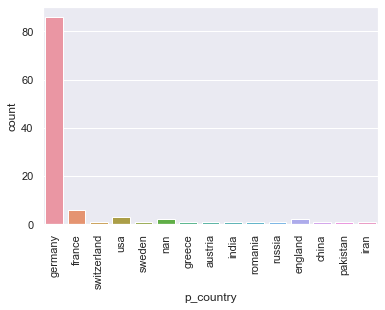

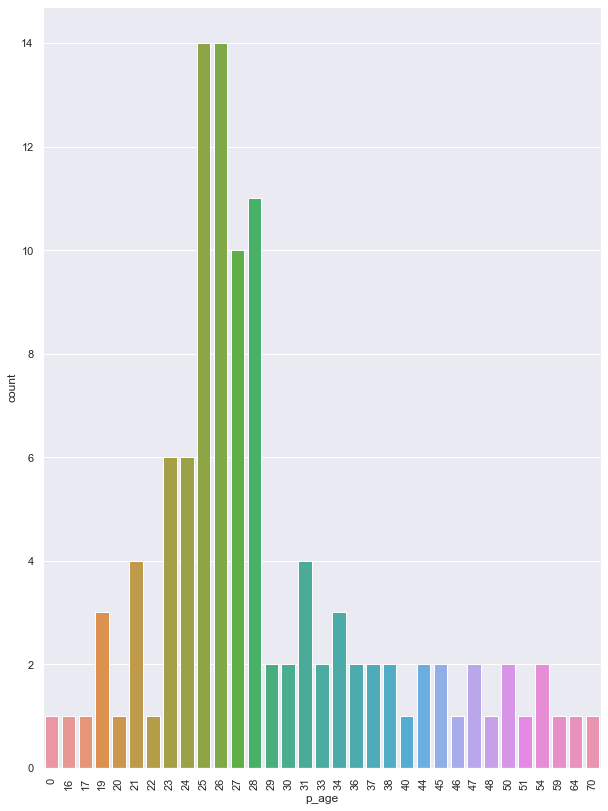

In [7]:
plt.figure()
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="p_country", data=df)
sns.set(rc={'figure.figsize':(10, 14)})
plt.xticks(rotation=90);
   
plt.figure()
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="p_age", data=df)
sns.set(rc={'figure.figsize':(10, 14)})
plt.xticks(rotation=90);

In [ ]:
#df_age_dist = df[['p_age','p_country']].copy()
#df_age_dist.head()
df.plot.scatter(x='p_age', y='p_education', c='DarkBlue')

## Cleaning the categories TRY1

In [ ]:
# function that takes a specific column out of the DataFrame, cleans it and returns it as a new DF
# needs DF column as dfColumnName and a string for the new DF column as cName

## TODO: Idea, rewrite function so that the demographic data is kept (sex, age, education, country, ...)
## --> DONE, see exploder()
## But rows are split due to multiple answers. How can I avoid the loss of data?
## https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows

def one_column_split(df_column, category_name):
    helper_series = df_column
    helper_series = helper_series.str.lower()
    helper_series = [c.replace(';', ', ') for c in helper_series]
    helper_series = [c.replace('/', ', ') for c in helper_series]
    helper_series = [c.replace('?', ', ') for c in helper_series]
    helper_series = [c.replace("'", " ") for c in helper_series]
    helper_series = [c.replace('-', '') for c in helper_series]
    helper_series = [c.replace(' ', '') for c in helper_series]
    
    helper_series = [x.split(',') for x in helper_series]
    helper_list = [x for y in helper_series for x in y]
    helper_df = pd.DataFrame(helper_list)
    helper_df = helper_df.rename(columns={0: category_name})

    return helper_df

In [ ]:
df_nineties_movies = one_column_split(df.nineties_movies, 'nineties_movies')
df_actors = one_column_split(df.actors, 'actors')
df_music_genres = one_column_split(df.music_genres, 'music_genres')
df_books = one_column_split(df.books, 'books')
df_authors = one_column_split(df.authors, 'authors')
df_politicians = one_column_split(df.politicians, 'politicians')
df_us_presidents = one_column_split(df.us_presidents, 'us_presidents')
df_cities = one_column_split(df.cities, 'cities')
df_lakes = one_column_split(df.lakes, 'lakes')
df_mountains = one_column_split(df.mountains, 'mountains')
df_european_capital_cities = one_column_split(df.european_capital_cities, 'european_capital_cities')
df_european_countries = one_column_split(df.european_countries, 'european_countries')
df_asian_countries = one_column_split(df.asian_countries, 'asian_countries')
df_continents = one_column_split(df.continents, 'continents')
df_birds = one_column_split(df.birds, 'birds')
df_african_animals = one_column_split(df.african_animals, 'african_animals')
df_furniture = one_column_split(df.furniture, 'furniture')
df_vegetables = one_column_split(df.vegetables, 'vegetables')
df_fast_food = one_column_split(df.fast_food, 'fast_food')
df_european_landmarks = one_column_split(df.european_landmarks, 'european_landmarks')
df_dax_companies = one_column_split(df.dax_companies, 'dax_companies')
df_us_companies = one_column_split(df.us_companies, 'us_companies')
df_us_tech_companies = one_column_split(df.us_tech_companies, 'us_tech_companies')
#p_age
#p_gender
#p_education
#p_country
            
print(df_nineties_movies)

In [ ]:
plt.figure()
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='music_genres', data=df_music_genres)
sns.set(rc={'figure.figsize':(10, 14)})
plt.xticks(rotation=90);

In [ ]:
plt.figure()
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='continents', data=df_continents)
sns.set(rc={'figure.figsize':(10, 14)})
plt.xticks(rotation=90);

In [ ]:
# Test: Cut everything after a comma (Here for us_companies)
df_cut_us_companies = df.copy()
df_cut_us_companies['us_companies'] = df_cut_us_companies['us_companies'].str.split(',').str[0]

df_cut_us_companies.head()

In [ ]:
df_continents.head()
#sns.catplot(x="continents", data=df_continents)

## Cleaning the categories TRY2

In [8]:
def exploder(data_frame, category_name_string):
    lst_col = category_name_string
    # build helper df consisting of the category + p (participant) columns
    helper_df = data_frame[[lst_col,'p_age','p_gender','p_education','p_country', 'p_id']].copy()
    
    # clean data by lowercasing, removing fault characters and whitespaces
    helper_df[lst_col] = helper_df[lst_col].str.lower()
    helper_df[lst_col] = helper_df[lst_col].replace('\/',',', regex=True).replace('\;',',', regex=True).replace('\?',',', regex=True).replace('\-','', regex=True).replace('\ ','', regex=True).replace("'","", regex=True)
    
    # split category column after each comma and explode (= make a new row and duplicate the other column values for each element)    
    helper_df = helper_df.assign(**{lst_col:helper_df[lst_col].str.split(',')})
    helper_df = helper_df.explode(lst_col)

    return helper_df

In [9]:
# Get specialised dataframes for each category consisting of the category values and all p (participant) data
df_nineties_movies = exploder(df, 'nineties_movies')
df_actors = exploder(df, 'actors')
df_music_genres = exploder(df, 'music_genres')
df_books = exploder(df, 'books')
df_authors = exploder(df, 'authors')
df_politicians = exploder(df, 'politicians')
df_us_presidents = exploder(df, 'us_presidents')
df_cities = exploder(df, 'cities')
df_lakes = exploder(df, 'lakes')
df_mountains = exploder(df, 'mountains')
df_european_capital_cities = exploder(df, 'european_capital_cities')
df_european_countries = exploder(df, 'european_countries')
df_asian_countries = exploder(df, 'asian_countries')
df_continents = exploder(df, 'continents')
df_birds = exploder(df, 'birds')
df_african_animals = exploder(df, 'african_animals')
df_furniture = exploder(df, 'furniture')
df_vegetables = exploder(df, 'vegetables')
df_fast_food = exploder(df, 'fast_food')
df_european_landmarks = exploder(df, 'european_landmarks')
df_dax_companies = exploder(df, 'dax_companies')
df_us_companies = exploder(df, 'us_companies')
df_us_tech_companies = exploder(df, 'us_tech_companies')
#p_age
#p_gender
#p_education
#p_country

amount_answers = (len(df_nineties_movies.index)+ len(df_actors.index)+ len(df_music_genres.index)+ len(df_books.index)+ len(df_authors.index)+ len(df_politicians.index)+ len(df_us_presidents.index)+ len(df_cities.index)+ len(df_lakes.index)+ len(df_mountains.index)+ len(df_european_capital_cities.index)+ len(df_european_countries.index)+ len(df_asian_countries.index)+ len(df_continents.index)+ len(df_birds.index)+ len(df_african_animals.index)+ len(df_furniture.index)+ len(df_vegetables.index)+ len(df_fast_food.index)+ len(df_european_landmarks.index)+ len(df_dax_companies.index)+ len(df_us_companies.index)+ len(df_us_tech_companies.index))/23
print('Average responses per category: '+ str(amount_answers))
df_dax_companies
#df_music_genres.to_csv('../data/oute.csv')

Average responses per category: 314.7826086956522


,dax_companies,p_age,p_gender,p_education,p_country,p_id
0,sap,26,Male,Bachelor's degree,germany,0
0,allianz,26,Male,Bachelor's degree,germany,0
0,lufthansa,26,Male,Bachelor's degree,germany,0
1,sap,44,Male,Doctorate (e.g. PhD),germany,1
1,bmw,44,Male,Doctorate (e.g. PhD),germany,1
...,...,...,...,...,...,...
107,volkswagen,50,Female,Doctorate (e.g. PhD),germany,107
107,bmw,50,Female,Doctorate (e.g. PhD),germany,107
108,mercedes,45,Female,Doctorate (e.g. PhD),germany,108
108,bosch,45,Female,Doctorate (e.g. PhD),germany,108


In [ ]:
# European capital cities
plt.figure()
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='european_capital_cities', data=df_european_capital_cities)
sns.set(rc={'figure.figsize':(10, 14)})
plt.xticks(rotation=90);

# Furniture
plt.figure()
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='furniture', data=df_furniture)
sns.set(rc={'figure.figsize':(10, 14)})
plt.xticks(rotation=90);


## Translating values to english

In [10]:
from deep_translator import DeeplTranslator
# https://github.com/nidhaloff/deep-translator
# Deepl API Key = 86ed8cd0-6f1c-8ade-b1bb-9e934b24f98a:fx

def cat_translator(data_frame, category_name_string):
    helper_df = data_frame
    helper_series = data_frame[category_name_string].tolist()
    trans_list = DeeplTranslator("86ed8cd0-6f1c-8ade-b1bb-9e934b24f98a:fx").translate_batch(helper_series)
    helper_df[category_name_string] = trans_list
    return helper_df

In [14]:
%%time
df_european_capital_cities_trans = cat_translator(df_european_capital_cities, 'european_capital_cities')
df_european_capital_cities_trans

CPU times: user 4.09 ms, sys: 15.7 ms, total: 19.8 ms
Wall time: 105 ms


,european_capital_cities,p_age,p_gender,p_education,p_country,p_id
0,berlin,26,Male,Bachelor's degree,germany,0
0,paris,26,Male,Bachelor's degree,germany,0
0,london,26,Male,Bachelor's degree,germany,0
1,amsterdam,44,Male,Doctorate (e.g. PhD),germany,1
1,berlin,44,Male,Doctorate (e.g. PhD),germany,1
...,...,...,...,...,...,...
107,romee,50,Female,Doctorate (e.g. PhD),germany,107
107,london,50,Female,Doctorate (e.g. PhD),germany,107
108,vienna,45,Female,Doctorate (e.g. PhD),germany,108
108,berlin,45,Female,Doctorate (e.g. PhD),germany,108


In [12]:
%%time
df_furniture_trans = cat_translator(df_furniture, 'furniture')

CPU times: user 7.59 s, sys: 746 ms, total: 8.33 s
Wall time: 2min 4s


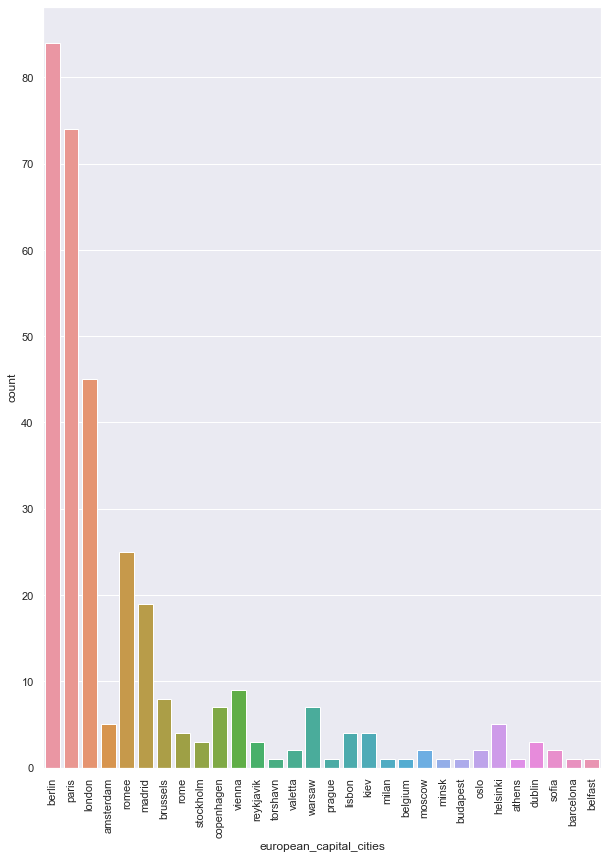

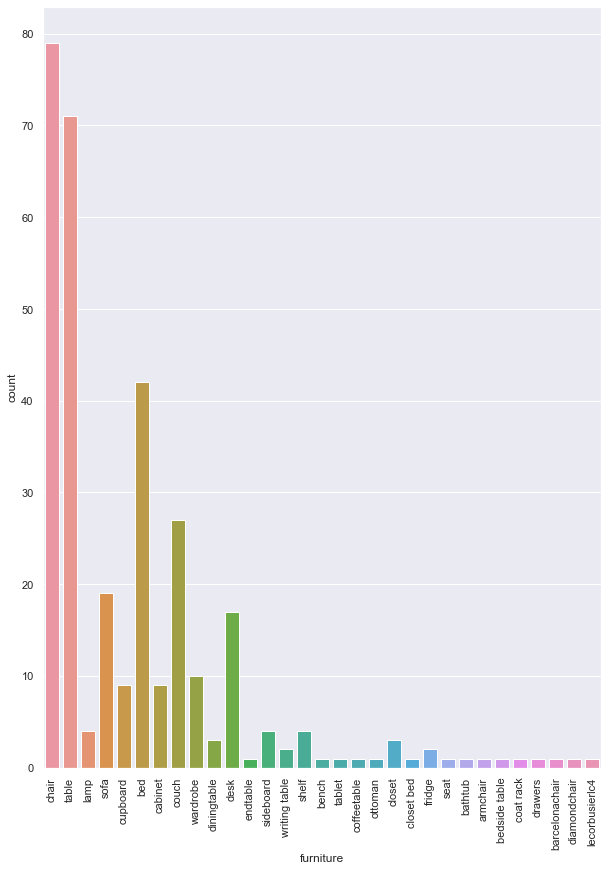

In [15]:
# European capital cities translated
plt.figure()
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='european_capital_cities', data=df_european_capital_cities_trans)
sns.set(rc={'figure.figsize':(10, 14)})
plt.xticks(rotation=90);

# Furniture
plt.figure()
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='furniture', data=df_furniture_trans)
sns.set(rc={'figure.figsize':(10, 14)})
plt.xticks(rotation=90);